In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, minmax_scale
from sklearn.metrics import r2_score
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/pykwon/python/refs/heads/master/testdata_utf8/Advertising.csv')
print(data.head(2))

del data['no']
print(data.head(2))

fdata = data[['tv', 'radio','newspaper']]
ldata = data[['sales']]
print(fdata[:2], ldata[:2])

# 정규화
# scaler = MinMaxScaler(feature_range=(0,1))
# fedata = scaler.fit_transform(fdata)
# print(fedata[:2])

fedata = minmax_scale(fdata, axis=0, copy=True) # 원본 보존
print(fedata[:3])

# train/test
x_train, x_test, y_train, y_test = train_test_split(fedata, ldata, test_size=0.3, random_state=123)

# model
model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
print(model.summary())

tf.keras.utils.plot_model(model, 'tf13.png', show_shapes=True, show_layer_names=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)
# validation_data = (x_vali, y_vali)

   no     tv  radio  newspaper  sales
0   1  230.1   37.8       69.2   22.1
1   2   44.5   39.3       45.1   10.4
      tv  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
      tv  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1    sales
0   22.1
1   10.4
[[0.77578627 0.76209677 0.60598065]
 [0.1481231  0.79233871 0.39401935]
 [0.0557998  0.92540323 0.60686016]]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 211.8003 - mse: 211.8003 - val_loss: 278.9538 - val_mse: 278.9538
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 209.3699 - mse: 209.3699 - val_loss: 275.9900 - val_mse: 275.9900
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 207.0521 - mse: 207.0521 - val_loss: 272.9419 - val_mse: 272.9419
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 204.4971 - mse: 204.4971 - val_loss: 269.7233 - val_mse: 269.7233
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 201.8088 - mse: 201.8088 - val_loss: 266.4499 - val_mse: 266.4499
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 199.2515 - mse: 199.2515 - val_loss: 263.1465 - val_mse: 263.1465
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 196.5688 - mse: 196.5688 - val_loss: 259.9097 - val_mse: 259.9097
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 193.9791 - mse: 193.9791 - val_loss: 256.6100 - val_mse: 256.6100
Epo

loss : [6.2306599617004395, 6.2306599617004395]
loss : [211.8003387451172, 209.36988830566406]
mse : [211.8003387451172, 209.36988830566406]
val_loss : [278.95379638671875, 275.9899597167969]
val_mse : [278.95379638671875, 275.9899597167969]


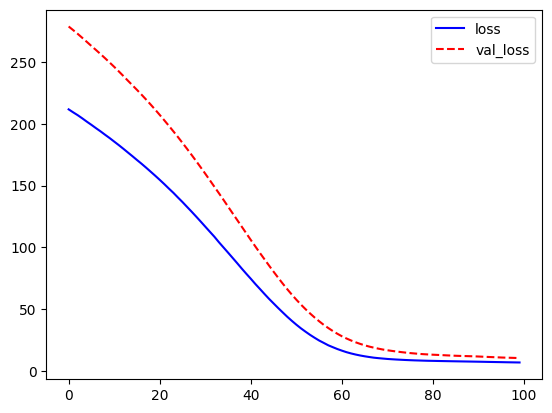

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
0.7637643814086914


In [10]:
# 모델 평가 점수
loss = model.evaluate(x_test, y_test, verbose=0)
print('loss :', loss)

# history 값 확인
# print('history :', history.history)
print('loss :', history.history['loss'][:2])
print('mse :', history.history['mse'][:2])
print('val_loss :', history.history['val_loss'][:2])
print('val_mse :', history.history['val_mse'][:2])

# loss 시각화
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()
# 둘 값의 차이가 크면 안된다.

# r2_score
print(r2_score(y_test, model.predict(x_test)))

